In [1]:
from monai.utils import first, set_determinism
from monai import transforms
from monai.data import Dataset, DataLoader
import torch
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
import u_net
from monai import inferers
import nibabel as nib
import utils
import engine
#from icecream import ic

c:\Users\graumnitz\AppData\Local\anaconda3\envs\heart\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] Die angegebene Prozedur wurde nicht gefunden'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
in_dir = Path.cwd()
target_dir = in_dir.parent / 'models'
target_dir.is_dir()

True

In [3]:
train_loss = np.load(target_dir / 'train_loss.npy' )
train_metric = np.load(target_dir / 'train_metric.npy')
test_loss = np.load(target_dir / 'test_loss.npy')
test_metric = np.load(target_dir / 'test_metric.npy')

In [4]:
# Debug
(target_dir / 'train_loss.npy').is_file(),(target_dir / 'train_metric.npy').is_file(), (target_dir / 'test_loss.npy').is_file(), (target_dir / 'test_metric.npy').is_file()


(True, True, True, True)

<Figure size 640x480 with 0 Axes>

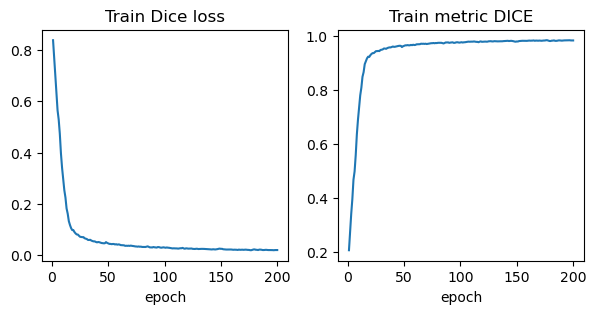

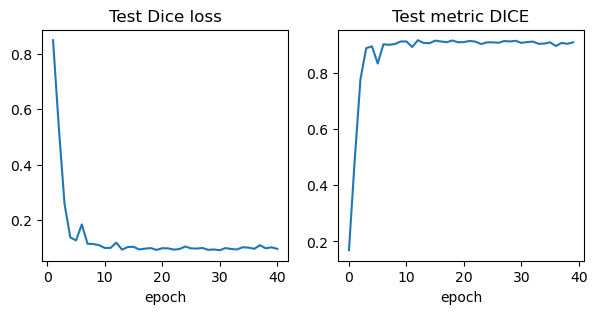

In [5]:
plt.figure(f'Results of {datetime.now().strftime("%d %B")}')
plt.figure(figsize = (7, 3))
plt.subplot(1, 2, 1)
plt.title('Train Dice loss')
x = [i + 1 for i in range(len(train_loss))]
y = train_loss
plt.xlabel('epoch')
plt.plot(x, y)

plt.subplot(1, 2, 2)
plt.title('Train metric DICE')
x = [i + 1 for i in range(len(train_metric))]
y = train_metric
plt.xlabel('epoch')
plt.plot(x, y)

plt.show()

plt.figure(figsize = (7, 3))
plt.subplot(1, 2, 1)
plt.title('Test Dice loss')
x = [i + 1 for i in range(len(test_loss))]
y = test_loss
plt.xlabel('epoch')
plt.plot(x, y)

plt.subplot(1, 2, 2)
plt.title('Test metric DICE')
x = [i for i in range(len(test_metric))]
y = test_metric
plt.xlabel('epoch')
plt.plot(x, y)

plt.show()

In [4]:
# For visualization with TensorBoard, use "--logdir ..\runs" in the command line and open TensorBoard in your browser with "localhost:6007".

^C


In [6]:
import data_setup
_, test_dataloader = data_setup.prepare(in_dir = in_dir.parent / 'test_data')

c:\Users\graumnitz\AppData\Local\anaconda3\envs\heart\Lib\site-packages\monai\utils\deprecate_utils.py:321: FutureWarning: monai.transforms.croppad.dictionary CropForegroundd.__init__:allow_smaller: Current default value of argument `allow_smaller=True` has been deprecated since version 1.2. It will be changed to `allow_smaller=False` in version 1.5.
  warn_deprecated(argname, msg, warning_category)


In [7]:
model, device = u_net.unet()
model.load_state_dict(torch.load(target_dir / 'ModelV5_diceloss.pth'))
model.eval()

UNet(
  (model): Sequential(
    (0): ResidualUnit(
      (conv): Sequential(
        (unit0): Convolution(
          (conv): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (unit1): Convolution(
          (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
      )
      (residual): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
    )
    (1): SkipConnection(
      (submodule): Sequential(
        (0): ResidualUnit(
          (conv): Sequential(


In [8]:
test_patient = next(iter(test_dataloader))
    

In [9]:
prediction, output = engine.perform_inference(model = model,
                                              test_patient = test_patient)

[INFO]
Image shape: torch.Size([1, 1, 128, 128, 64])
Label shape: torch.Size([1, 1, 128, 128, 64])
Binary segmentation shape: torch.Size([1, 8, 128, 128, 64])
Multi segmentation shape: torch.Size([1, 1, 128, 128, 64])


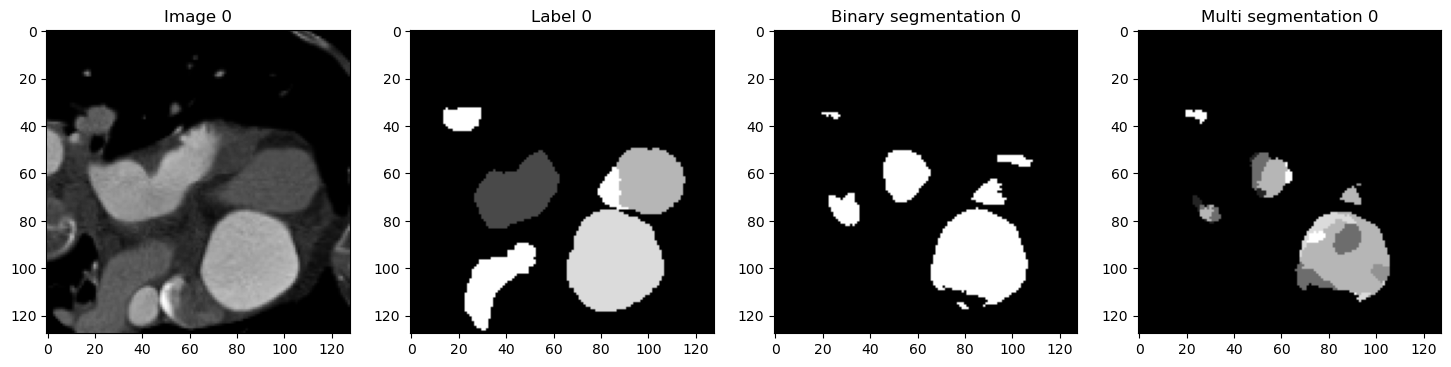

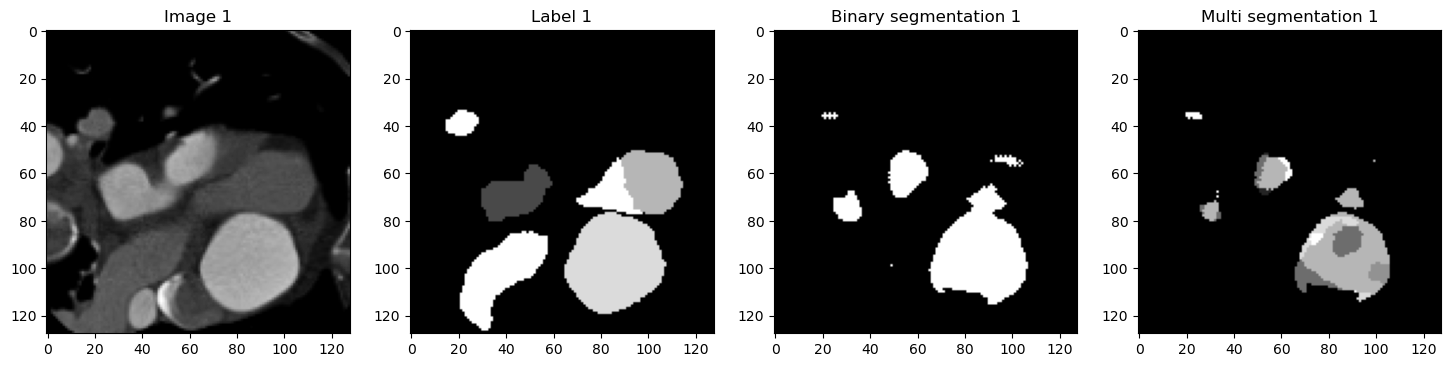

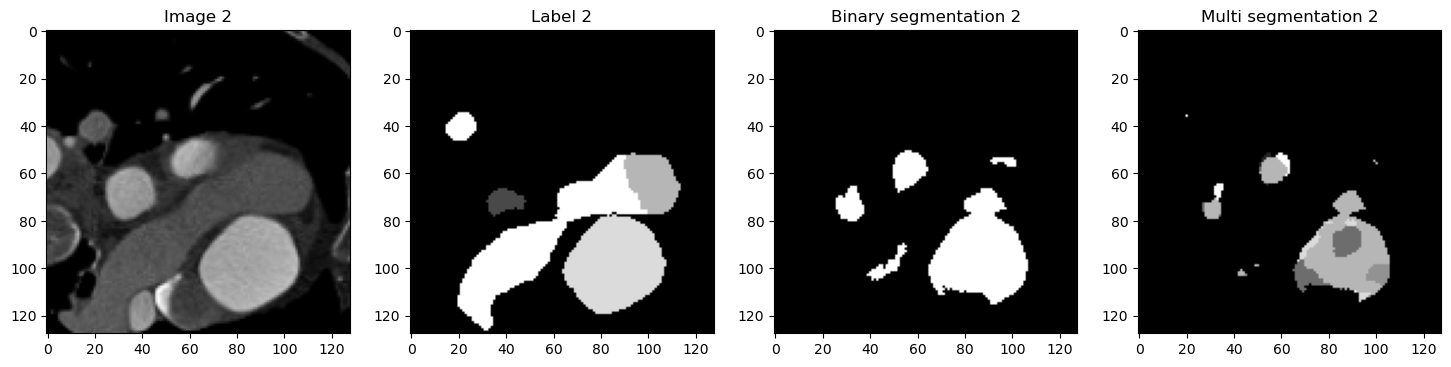

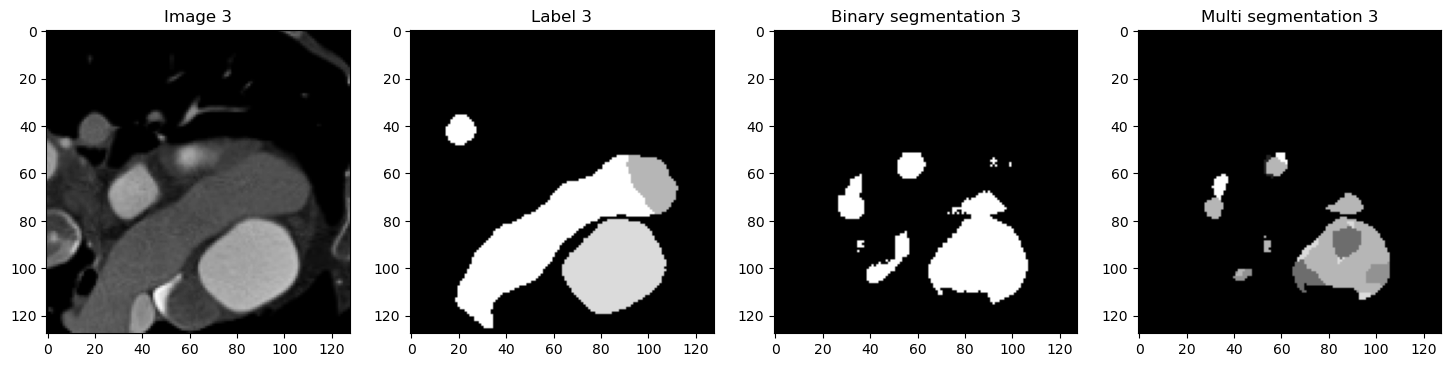

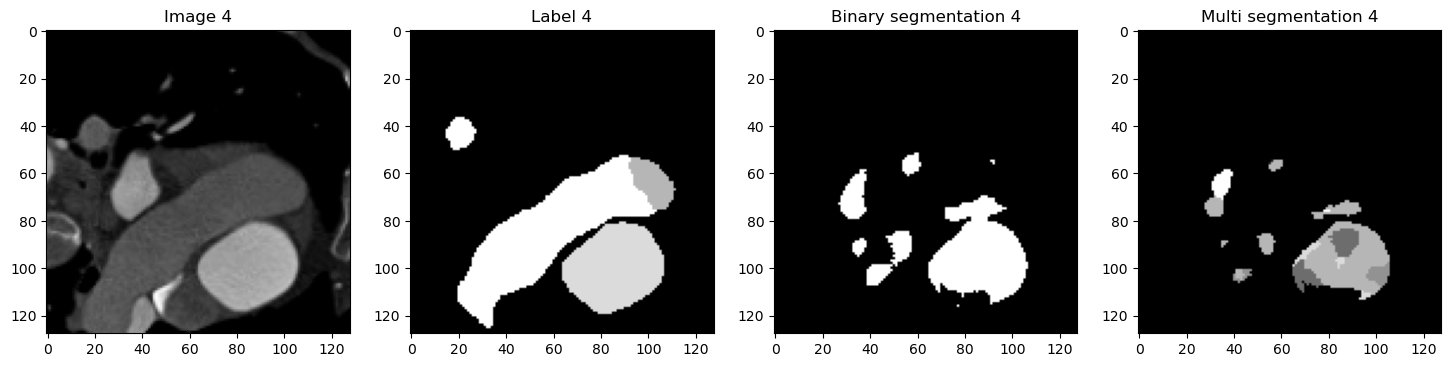

In [10]:
utils.plot_image_label_prediction(test_patient = test_patient,
                                  prediction = prediction,
                                  test_outputs = output)

(torch.Size([1, 1, 128, 128, 64]),
 torch.Size([1, 8, 128, 128, 64]),
 torch.Size([1, 1, 128, 128, 64]))

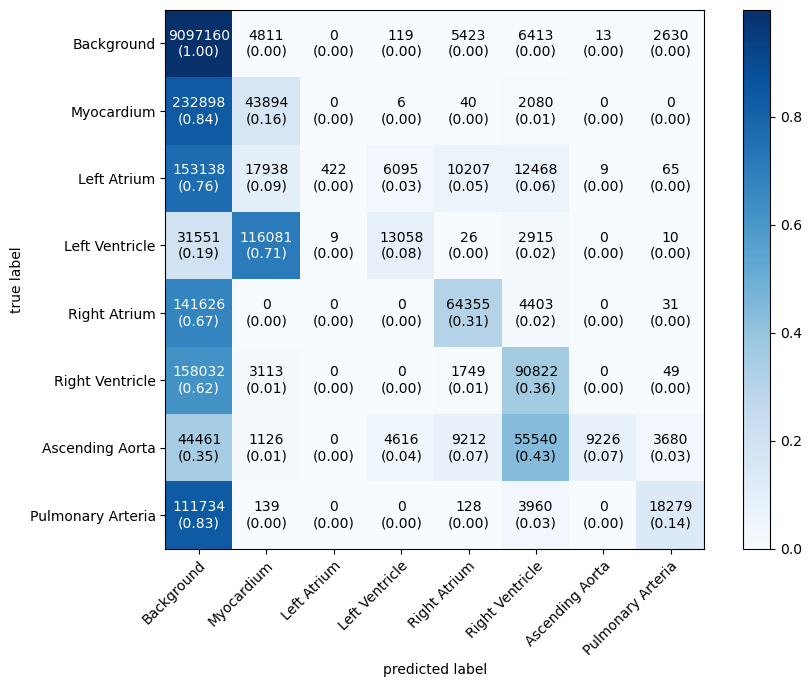

In [11]:
class_names = ['Background', 'Myocardium', 'Left Atrium', 'Left Ventricle', 'Right Atrium', 'Right Ventricle', 'Ascending Aorta', 'Pulmonary Arteria']

prediction_list = utils.plot_confusion_matrix(model = model,
                                              test_dataloader = test_dataloader,
                                              class_names = class_names)

In [9]:
utils.save_nifti(prediction_list = prediction_list,
                  out_dir = Path.cwd().parent)

[INFO] Saving prediction_0 Nifti file to d:\Meine Ablage\@ Adrian\__heartsegmentation
[INFO] Saving prediction_1 Nifti file to d:\Meine Ablage\@ Adrian\__heartsegmentation
[INFO] Saving prediction_2 Nifti file to d:\Meine Ablage\@ Adrian\__heartsegmentation
[INFO] Saving prediction_3 Nifti file to d:\Meine Ablage\@ Adrian\__heartsegmentation
[INFO] Saving prediction_4 Nifti file to d:\Meine Ablage\@ Adrian\__heartsegmentation
[INFO] Saving prediction_5 Nifti file to d:\Meine Ablage\@ Adrian\__heartsegmentation
[INFO] Saving prediction_6 Nifti file to d:\Meine Ablage\@ Adrian\__heartsegmentation
[INFO] Saving prediction_7 Nifti file to d:\Meine Ablage\@ Adrian\__heartsegmentation
[INFO] Saving prediction_8 Nifti file to d:\Meine Ablage\@ Adrian\__heartsegmentation
[INFO] Saving prediction_9 Nifti file to d:\Meine Ablage\@ Adrian\__heartsegmentation


In [31]:
target_size = (512, 512, 363)



# Interpolation durchführen
resized_prediction = torch.nn.functional.interpolate(
    prediction.unsqueeze(0).type(torch.float),  # Batch- und Kanal-Dimension hinzufügen
    size=target_size,
    mode='trilinear',  # Dreidimensionale Interpolation
    align_corners=False
)

# Die zusätzlichen Dimensionen wieder entfernen
resized_prediction = resized_prediction.squeeze(0).squeeze(0)

# Überprüfen der Größe
print(resized_prediction.shape)
nib.save(nib.Nifti1Image(resized_prediction.cpu().numpy().astype(float), affine = None), 'test2.nii.gz')

torch.Size([512, 512, 363])


In [27]:
prediction.shape

torch.Size([1, 128, 128, 64])